# **Uber vs. Lyft** : Linear Regression Model 

By [Dito Wicaksana P.](https://github.com/ditoowp) | Data Resource: [Kaggle](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

<center><img src="https://imgtr.ee/images/2024/07/14/d4d61da3c007124e92a2305c005dc0af.png" width=65% /></center>

---

## Introduction

<p style="text-align: justify;">
Uber dan Lyft merupakan dua perusahaan <em>ride-hailing</em>  terbesar yang menyediakan layanan transportasi melalui aplikasi seluler. Didirikan di San Francisco, Uber pada tahun 2009 dan Lyft pada tahun 2012, keduanya menawarkan alternatif transportasi yang nyaman dibandingkan dengan taksi tradisional atau transportasi umum. Uber telah berkembang menjadi perusahaan global yang beroperasi di ratusan kota di seluruh dunia, menawarkan berbagai layanan mulai dari UberX yang terjangkau hingga UberBLACK yang mewah. Lyft, meskipun beroperasi di lebih sedikit negara dibandingkan Uber, telah memperluas jangkauannya ke banyak kota di Amerika Serikat dan Kanada, dengan fokus pada pengalaman pengguna yang ramah dan layanan yang kompetitif. Keduanya bersaing ketat dalam hal harga, ketersediaan kendaraan, dan fitur tambahan seperti program loyalitas dan opsi berbagi perjalanan.
</p>

## Objective

<p style="text-align: justify;">
Tujuan utama dari proyek ini adalah mengembangkan model regresi linear untuk memprediksi <strong>price</strong> atau biaya <em>ride-hailing</em>  untuk Uber dan Lyft. Model prediktif ini bertujuan untuk mengidentifikasi dan mengukur hubungan antara biaya perjalanan dan beberapa faktor yang mempengaruhinya, yang meliputi:
</p>

* **Jam Kerja**: Waktu dalam sehari dan apakah termasuk dalam jam kerja atau periode permintaan tinggi.
* **Kondisi Cuaca**: Berbagai parameter cuaca seperti suhu, curah hujan, dan visibilitas yang mungkin mempengaruhi biaya perjalanan.
* **Jarak**: Total jarak yang ditempuh selama perjalanan.
* **Destinasi**: Destinasi spesifik atau jenis area (misalnya, bandara, pusat kota, pinggiran kota) yang menjadi tujuan perjalanan.

<p style="text-align: justify;">
Dengan menganalisis faktor-faktor ini, model ini bertujuan untuk memberikan prediksi biaya perjalanan yang akurat, memberikan wawasan berharga bagi pelanggan dan penyedia layanan di industri ride-hailing. Tujuan utamanya adalah untuk meningkatkan pemahaman tentang bagaimana berbagai variabel mempengaruhi penetapan harga, sehingga memungkinkan pengambilan keputusan yang lebih baik dan mungkin mengoptimalkan strategi penetapan harga.
</p>

## Importing Libraries Needed

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Training model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from feature_engine.outliers import Winsorizer
from scipy.stats import pearsonr, kendalltau, spearmanr
from statsmodels.stats.stattools import durbin_watson

# Saving model
import pickle
import json

In [2]:
# Setting untuk display kolom (opsional)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

## Data Loading

In [3]:
# Defining dataframe 
df = pd.read_csv('rideshare_kaggle.csv')
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
# Display information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# Check the shape of the dataframe
df.shape

(693071, 57)

In [6]:
# Summary stats of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


<p style="text-align: justify;">
Kolom temperature memiliki mean 39 Fahreinheit (karena data yang diambil di New York diasumsikan menggunakan Fahreinheit) yang apabila dikonversikan ke Celsius adalah 3,8 C. Diasumsikan dikarenakan suhu yang dingin, orang-orang cenderung lebih banyak menggunakan Uber atau Lyft karena ada </em>heater</em> di dalam mobil dibandingkan berjalan (</em>pedestrian</em>) atau bersepeda ke tujuan, mengingat Kota New York memiliki jumlah </em>pedestrian</em> dan pengguna sepeda yang cukup banyak dengan nilai 384.380 untuk *pedestrian* dan 54.919 untuk pengguna sepeda(*). 

(*) Reference   : https://a816-dohbesp.nyc.gov/IndicatorPublic/data-explorer/walking-driving-and-cycling/?id=2415#display=summary
</p>

In [7]:
# Check for dupes
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat *missing values* pada `price`, selanjut akan dicek terlebih dahulu mengapa terdapat *missing values* pada kolom tersebut.

In [9]:
# Check row mana saja yang price value-nya null
df[df['price'].isnull()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.50,1.0,42.3519,-71.0551,50.71,50.71,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.83,3.55,4.79,1544918400,9.909,54.46,1544896800,39.29,1544954400,53.79,1544896800,35.17,154494

*Values* yang *missing* di sini terdapat kesamaan pada `name`, yaitu semuanya itu **Taxi**. Diasumsikan kolom `name` di sini mungkin jenis kendaraannya. Kolom `price` yang kosong semuanya berasal dari kolom `name` dengan kategorinya **Taxi**. Taxi sendiri bukan termasuk dari aplikasi ride-hailing tersebut, mungkin saja *driver* taxi karena sepi job sehingga berpikir untuk menggunakan aplikasi Uber atau Lyft itu sendiri untuk mendapatkan income yang lebih dari *job* taxi biasa. 

Jadi, karena taxi bukan pihak yang berasosiasi langsung dengan Uber atau Lyft tidak terhitung price-nya. Tipe *missing values* disini adalah **MNAR** (*Missing Not at Random*) dikarenakan `price` terkait langsung dengan jenis kendaraanya, yang mana disini adalah taxi. Sehingga kolom null bisa di-drop saja.


In [10]:
# Dropping missing values
df.dropna(axis=0, inplace=True)
df.isnull().sum().sum()

0

In [11]:
# Display column names
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

`visibility` dan `visibility.1` sepertinya sama, sehingga dicek dulu apakah datanya sama atau tidak.

In [12]:
# Check value visibility and visibility.1
(df['visibility'] == df['visibility.1']).all()

True

Memiliki value yang sama, makadari itu akan di-*drop* saja yang `visibility.1`.

In [13]:
# Drop kolom visibility.1
df = df.drop(['visibility.1'], axis = 1)

In [14]:
# Data types of each columns
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

`datetime` masih menggunakan data type object, lebih baik lagi menggunakan data type yang sesuai yaitu date time.

In [15]:
# Changing to the appropriate data type
df['datetime'] = pd.to_datetime(df['datetime'])

## Exploratory Data Analysis (EDA)

Pada tahap ini hanya akan menganalisis bagian yang ada pada **objective**, yaitu jam kerja, kondisi cuaca, jarak, dan destinasi pemesanan.

### Overall Usage Between Uber and Lyft

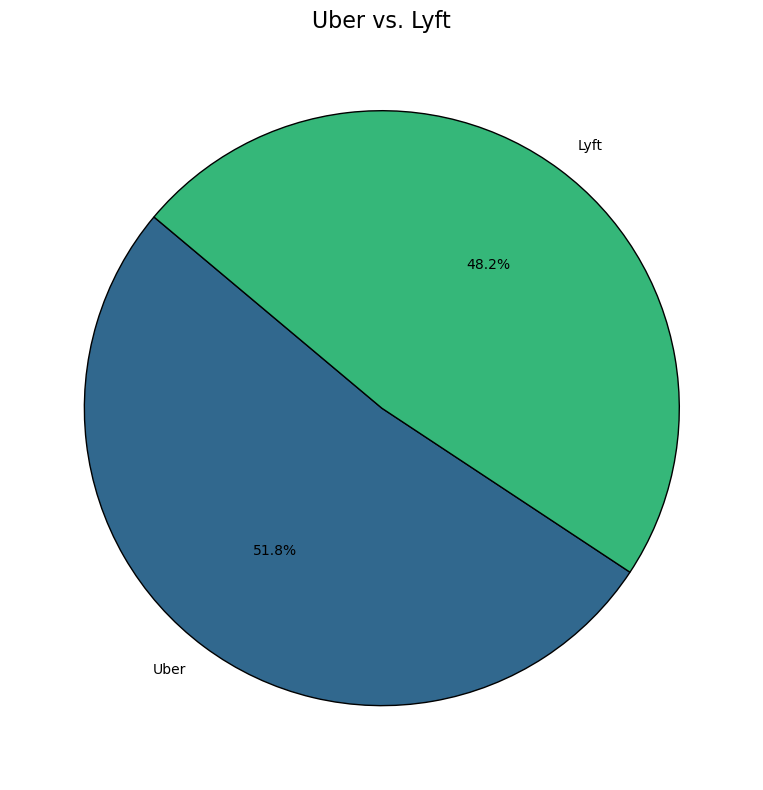

In [16]:
# Create and plot the pie chart for the first column (Q1)
value_counts = df['cab_type'].value_counts()
colors = sns.color_palette('viridis', len(value_counts))

plt.figure(figsize=(10, 8))
plt.pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,  
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Uber vs. Lyft', fontsize=16)
plt.tight_layout()
plt.show()

Uber memiliki penggunaan yang lebih banyak dibandingkan dengan Lyft. Ini mungkin dikarenakan beberapa hal :
* Uber merupakan aplikasi ride-hailing pertama dan sudah familiar bagi orang-orang.
* Uber juga memeiliki fitur UberPool, fitur dimana pengguna bisa berbagi tumpangan dengan orang lain dengan harga yang jauh lebih murah.

### Jam Kerja

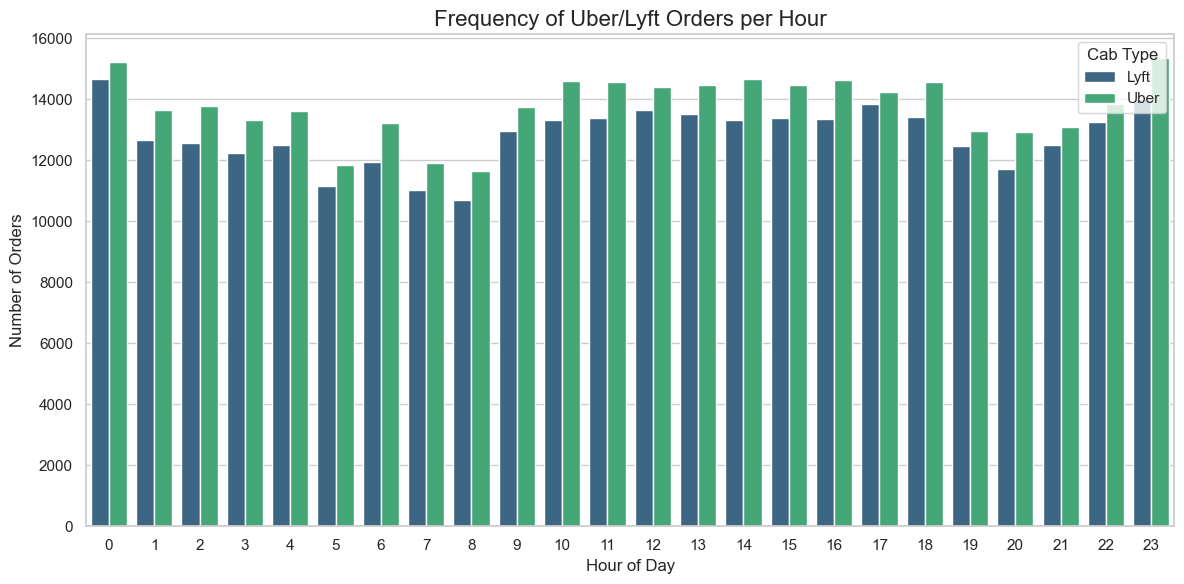

In [17]:
# Set the theme
sns.set_theme(style="whitegrid")

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(
    x='hour', 
    data=df, 
    hue='cab_type', 
    palette='viridis'
)

# Add titles and labels
plt.title('Frequency of Uber/Lyft Orders per Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Improve legend
plt.legend(title='Cab Type')

# Display the plot
plt.tight_layout()
plt.show()

Ternyata orang-orang menggunakan aplikasi ride-hailing ketika tengah malam dibandingkan jam kerja. Hal ini diasumsikan karena :
* New York merupakan kota dengan tingkat kejahatan yang cukup tinggi (*), sehingga orang lebih memilih menggunakan aplikasi ride-hailing untuk menghindari hal tersebut daripada pulang sendiri.
* Taxi banyak yang sudah tidak beroperasi pada jam tersebut, sehingga pilihannya hanya aplikasi ride-hailing.
* Banyak orang di New York jam kerjanya malam hari, sehingga orang memilih menggunakan aplikasi ride-hailing ini karena dinilai lebih praktis dan cepat.

(*) Reference : https://www.fox5ny.com/news/nyc-crime-rates-stats-numbers-spring-2024

### Kondisi Cuaca

Untuk visualisasi pada bagian kondisi cuaca akan menggunakan **Heatmap Correlation** untuk mengetahui apakah ada hubungan antara kondisi cuaca dengan biaya pemesanan.

In [18]:
# Creating new dataframe for weather only
df_cuaca = df[['temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability', 
       'humidity', 'windSpeed','windGust',
        'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'price']]

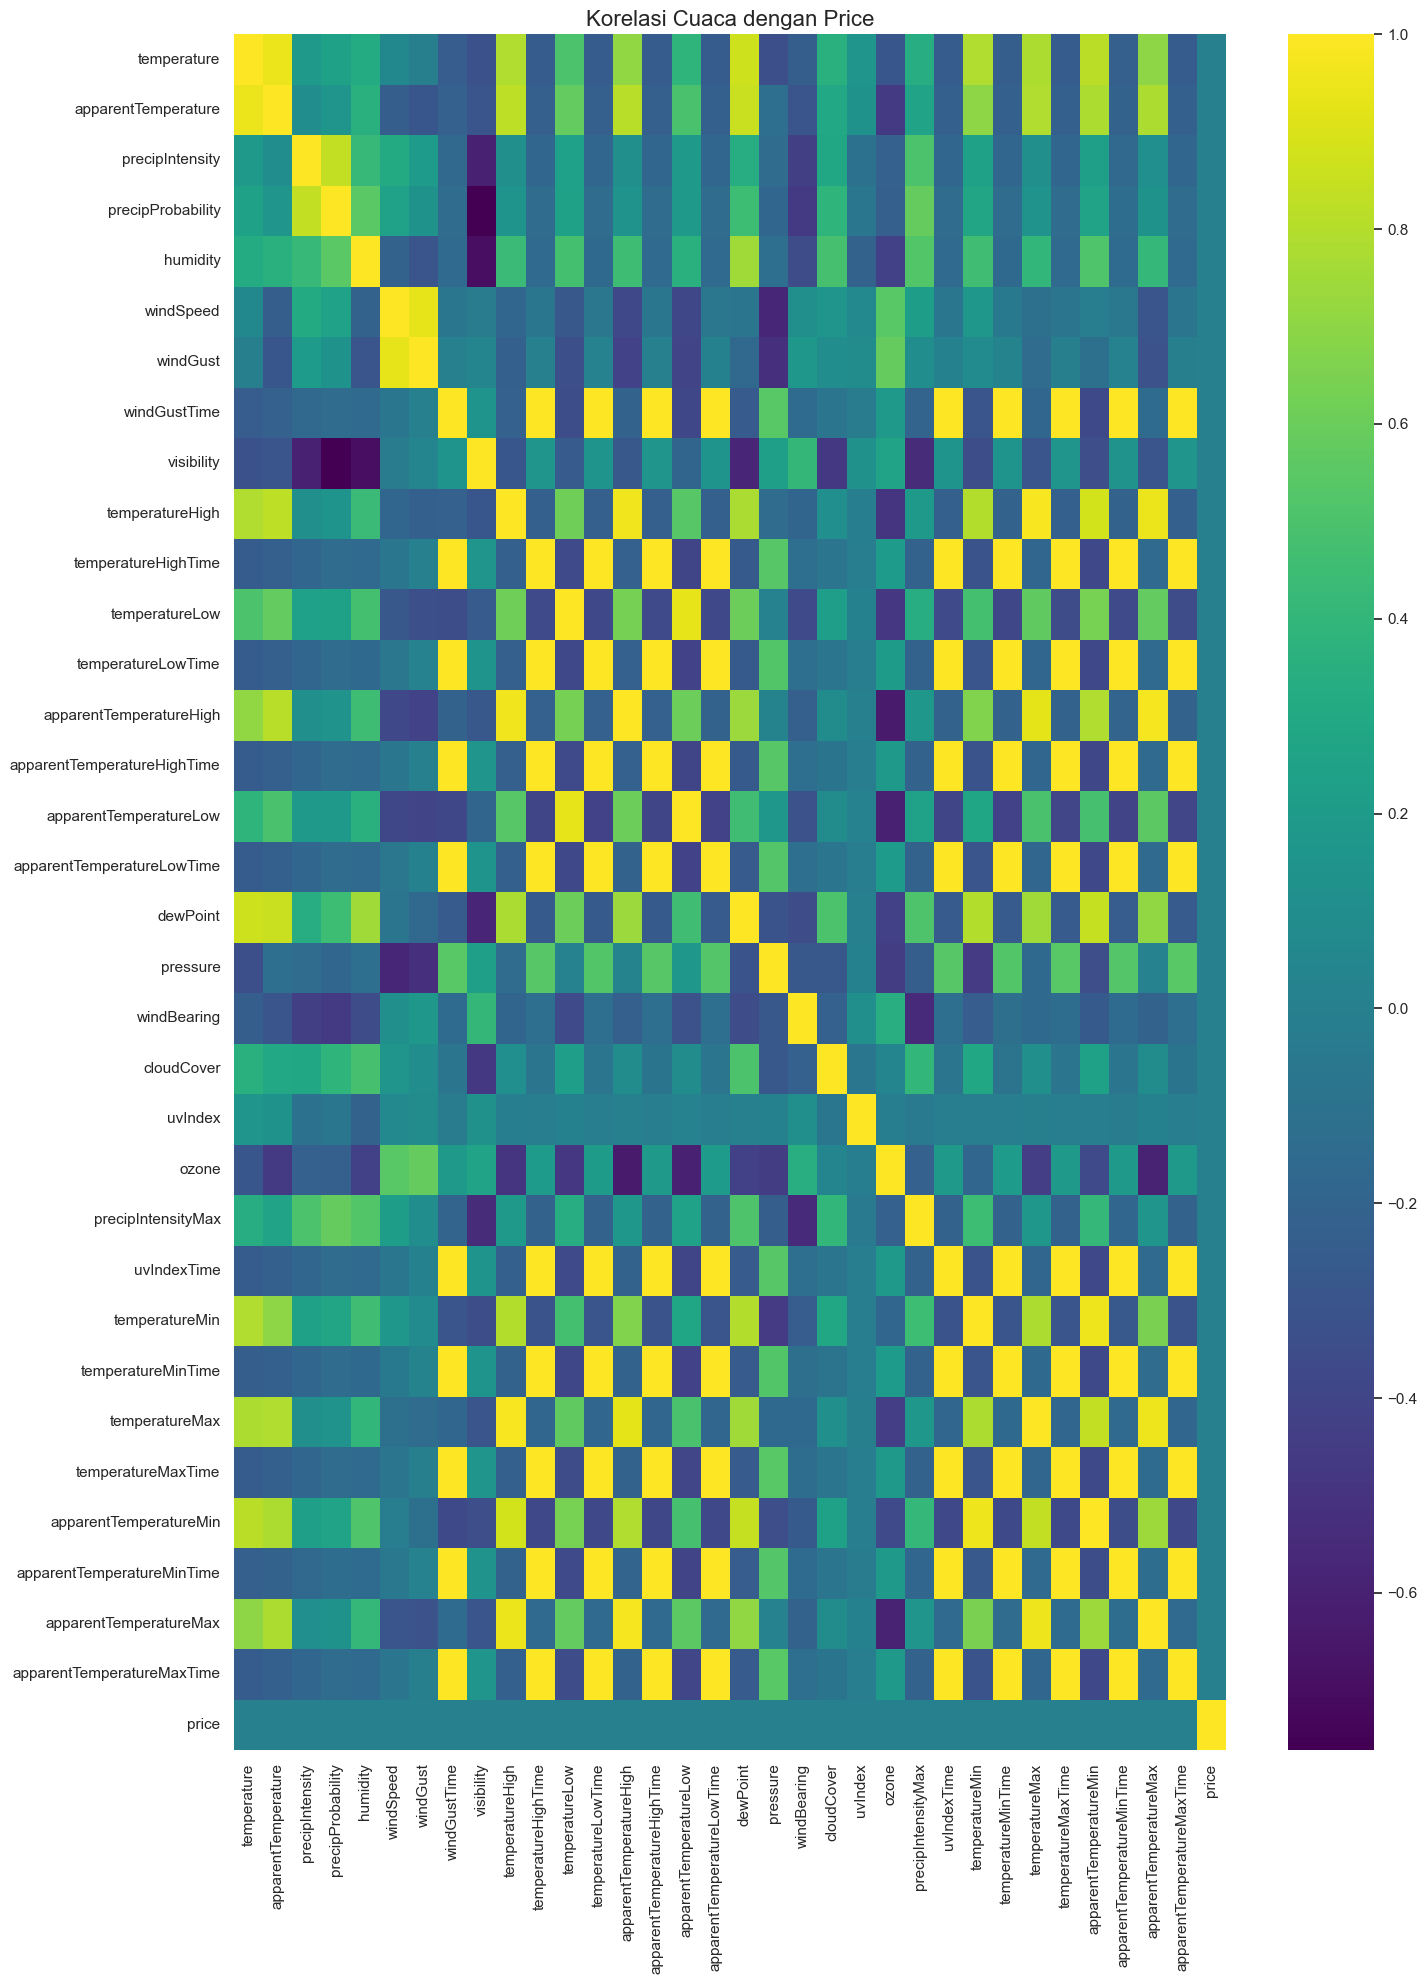

In [19]:
# Set the theme
sns.set_theme(style="whitegrid")

# Plot heatmap with viridis color palette
plt.figure(figsize=(15, 20))
sns.heatmap(df_cuaca.corr(), cmap='viridis')

# Add title
plt.title('Korelasi Cuaca dengan Price', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

Ternyata berdasarkan visualisasi heatmap menunjukkan bahwa semua kolom yang berhubungan dengan cuaca tidak memiliki korelasi terhadap `price`. Karena tidak memiliki korelasi terhadap target, maka bisa di-*drop* saja.

### Jarak

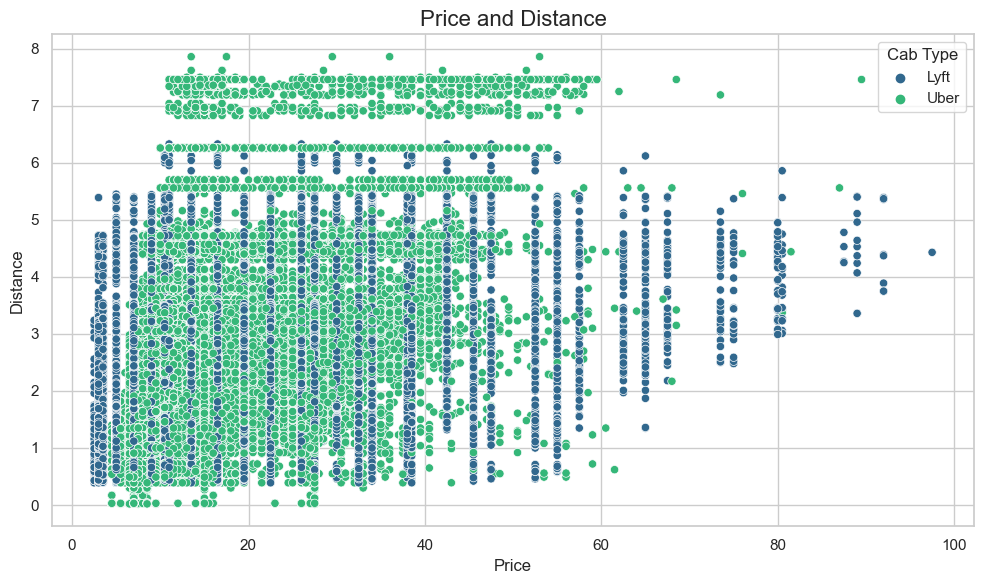

In [20]:
# Set the theme
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='price', 
    y='distance', 
    data=df, 
    hue='cab_type', 
    palette='viridis'
)

# Add titles and labels
plt.title('Price and Distance', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Improve legend
plt.legend(title='Cab Type')

# Display the plot
plt.tight_layout()
plt.show()

Dapat dilihat bahwa `distance` dan `price` menunjukkan semakin tinggi distance yang ditempuh juga semakin tinggi price-nya. Tapi ada beberapa data yang sepertinya tidak terpengaruh akan `distance`. Ini bisa jadi karena jenis kendaraannya yang berbeda, waktu pemesanannya yang sedang ramai, dan juga terpengaruhi kondisi kemacetan jalan juga.

### Destinasi dan Source

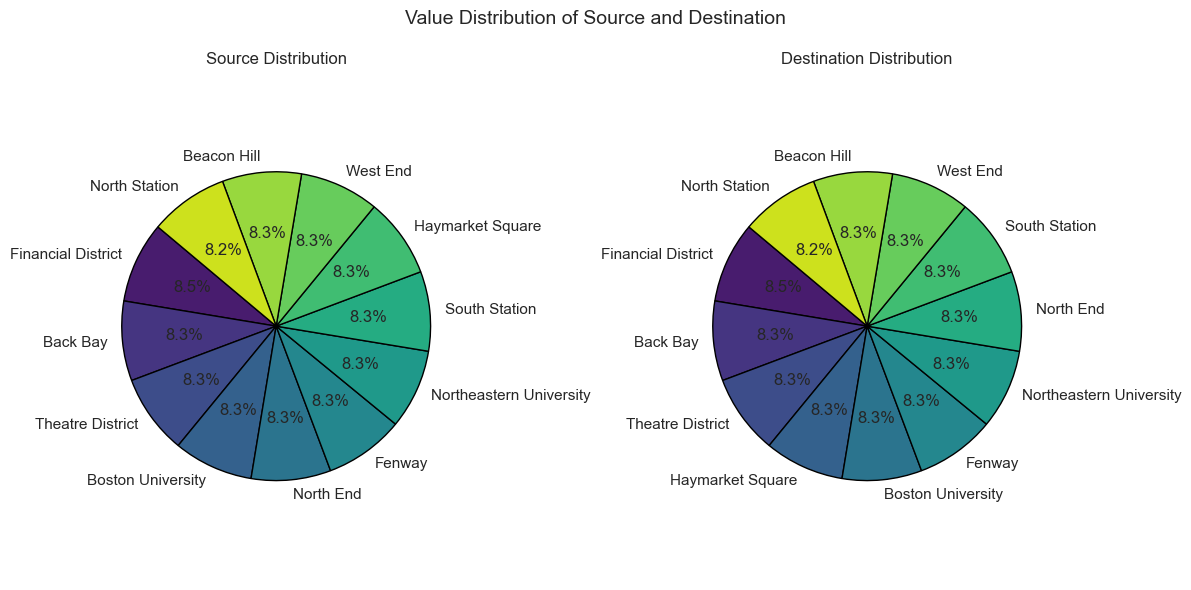

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots

# Plot pie chart for source data
source_counts = df['source'].value_counts()
colors = sns.color_palette('viridis', len(source_counts))
ax1.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Source Distribution', fontsize=12)
ax1.axis('equal')  # Equal aspect ratio for a circular pie chart

# Plot pie chart for destination data
destination_counts = df['destination'].value_counts()
colors = sns.color_palette('viridis', len(destination_counts))
ax2.pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
ax2.set_title('Destination Distribution', fontsize=12)
ax2.axis('equal')  # Equal aspect ratio

plt.suptitle('Value Distribution of Source and Destination', fontsize=14)  # Overall title
plt.tight_layout()
plt.show()

`source` dan `destination` distribusi datanya cukup merata. Financial district memiliki persentase sedikit lebih banyak dengan yang lain diasumsikan karena beberapa hal:
* Finacial District merupakan pusat keuangan di Kota New York, selain itu bank-bank besar berada disini.
* Tempat wisatawan, wisatawan kesini mungkin untuk sightseeing Wall Street, patung Charging Bull, dan 9/11 Memorial dan Museum juga terletak di Financial District ini.

Jadi dapat disimpulkan, orang-orang yang memesan aplikasi ride-hailing ini antara orang kerja di bidang finance atau wisatawan.

## Feature Engineering

### Drop Irrelevant Columns

Men-*drop* kolom yang dirasa tidak relevan terhadap target, seperti `sunriseTime`, `sunsetTime`, dan `moonPhase`. *Feature* tersebut tidak dibutuhkan karena hanya menunjukkan waktu matahari terbit, terbenam, dan fase bulan yang mana tidak berpengaruh terhadap biaya *ride-hailing*.

*Feature* `id` dan `timestamp` juga tidak dibutuhkan karena masing-masing *value*-nya unik dan tidak relevan juga terhadap target. Selain itu, `longitude` dan `latitude` juga tidak dibutuhkan karena data yang diambil dari tempat yang sama yaitu New York.

In [22]:
# Drop columns
df = df.drop(['sunriseTime', 'sunsetTime', 'moonPhase', 'id', 'timestamp', 'longitude', 'latitude'], axis = 1)

Selain itu, pada tahap **EDA** dapat diketahui bahwa kondisi cuaca ternyata tidak memiliki korelasi terhadap target, sehingga bisa di-*drop* juga.

In [23]:
# Drop weather related columns
df = df.drop(columns=[
    'temperature', 'apparentTemperature', 'precipIntensity', 
    'precipProbability', 'humidity', 'windSpeed', 'windGust', 
    'windGustTime', 'visibility', 'temperatureHigh', 
    'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
    'apparentTemperatureHigh', 'apparentTemperatureHighTime',
    'apparentTemperatureLow', 'apparentTemperatureLowTime', 
    'dewPoint', 'pressure', 'windBearing', 'cloudCover', 
    'uvIndex', 'ozone', 'precipIntensityMax', 'uvIndexTime', 
    'temperatureMin', 'temperatureMinTime', 'temperatureMax',
    'temperatureMaxTime', 'apparentTemperatureMin',
    'apparentTemperatureMinTime', 'apparentTemperatureMax',
    'apparentTemperatureMaxTime'])

In [24]:
# Check dataframe shape after dropping
df.shape

(637976, 16)

### Handling Cardinality

In [25]:
# Separating features with object/category data type
cat_col = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_col:
    listItem.append([col, df[col].nunique(), df[col].unique()])

# Create a new dataframe just to show the unique value of each features
pd.DataFrame(columns=['Nama Kolom', 'Jumlah Value Unique', 'Value Unique'], data=listItem)

,Nama Kolom,Jumlah Value Unique,Value Unique
0,timezone,1,[America/New_York]
1,source,12,"[Haymarket Square, Back Bay, North End, North Station, Beacon Hill, Boston University, Fenway, South Station, Theatre District, West End, Financial District, Northeastern University]"
2,destination,12,"[North Station, Northeastern University, West End, Haymarket Square, South Station, Fenway, Theatre District, Beacon Hill, Back Bay, North End, Financial District, Boston University]"
3,cab_type,2,"[Lyft, Uber]"
4,product_id,12,"[lyft_line, lyft_premier, lyft, lyft_luxsuv, lyft_plus, lyft_lux, 6f72dfc5-27f1-42e8-84db-ccc7a75f6969, 6c84fd89-3f11-4782-9b50-97c468b19529, 55c66225-fbe7-4fd5-9072-eab1ece5e23e, 9a0e7b09-b92b-4c41-9779-2ad22b4d779d, 6d318bcc-22a3-4af6-bddd-b409bfce1546, 997acbb5-e102-41e1-b155-9df7de0a73f2]"
5,name,12,"[Shared, Lux, Lyft, Lux Black XL, Lyft XL, Lux Black, UberXL, Black, UberX, WAV, Black SUV, UberPool]"
6,short_summary,9,"[ Mostly Cloudy , Rain , Clear , Partly Cloudy , Overcast , Light Rain , Foggy , Possible Drizzle , Drizzle ]"
7,long_summary,11,"[ Rain throughout the day. , Rain until morning, starting again in the evening. , Light rain in the morning. , Partly cloudy throughout the day. , Mostly cloudy throughout the day. , Light rain in the morning and overnight. , Light rain until evening. , Foggy in the morning. , Overcast throughout the day. , Possible drizzle in the morning. , Rain in the morning and afternoon. ]"
8,icon,7,"[ partly-cloudy-night , rain , clear-night , cloudy , fog , clear-day , partly-cloudy-day ]"


Pada `product_id` ada beberapa data yang tidak jelas dan dirasa tidak relevan untuk target, sehingga diputuskan untuk di-*drop*. `long_summary` dan `icon` juga dirasa tidak dibutuhkan karena data sudah tercukupi pada `short_summary`, jadi sama halnya dengan `product_id` di-*drop* juga. Selain itu, `timezone` merupakan tempat dimana dataset diambil dan data yang diambil semuanya dari tempat yang sama yaitu New York, sehingga dapat di-drop saja.

In [26]:
# Drop columns
df = df.drop(['product_id', 'long_summary', 'timezone', 'icon'], axis = 1)

In [27]:
# Display shape
df.shape

(637976, 12)

### Splitting Data

In [28]:
# Split 'X' dan 'y'
X = df.drop(['price'], axis = 1)## Drop kolom target
y = df['price']
X

,hour,day,month,datetime,source,destination,cab_type,name,distance,surge_multiplier,short_summary
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,Mostly Cloudy
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,Rain
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,Clear
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,Clear
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,WAV,1.00,1.0,Partly Cloudy
693066,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,1.00,1.0,Partly Cloudy
693067,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,1.00,1.0,Partly Cloudy
693069,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,1.00,1.0,Partly Cloudy


### **Assumption** - Linear Relationship

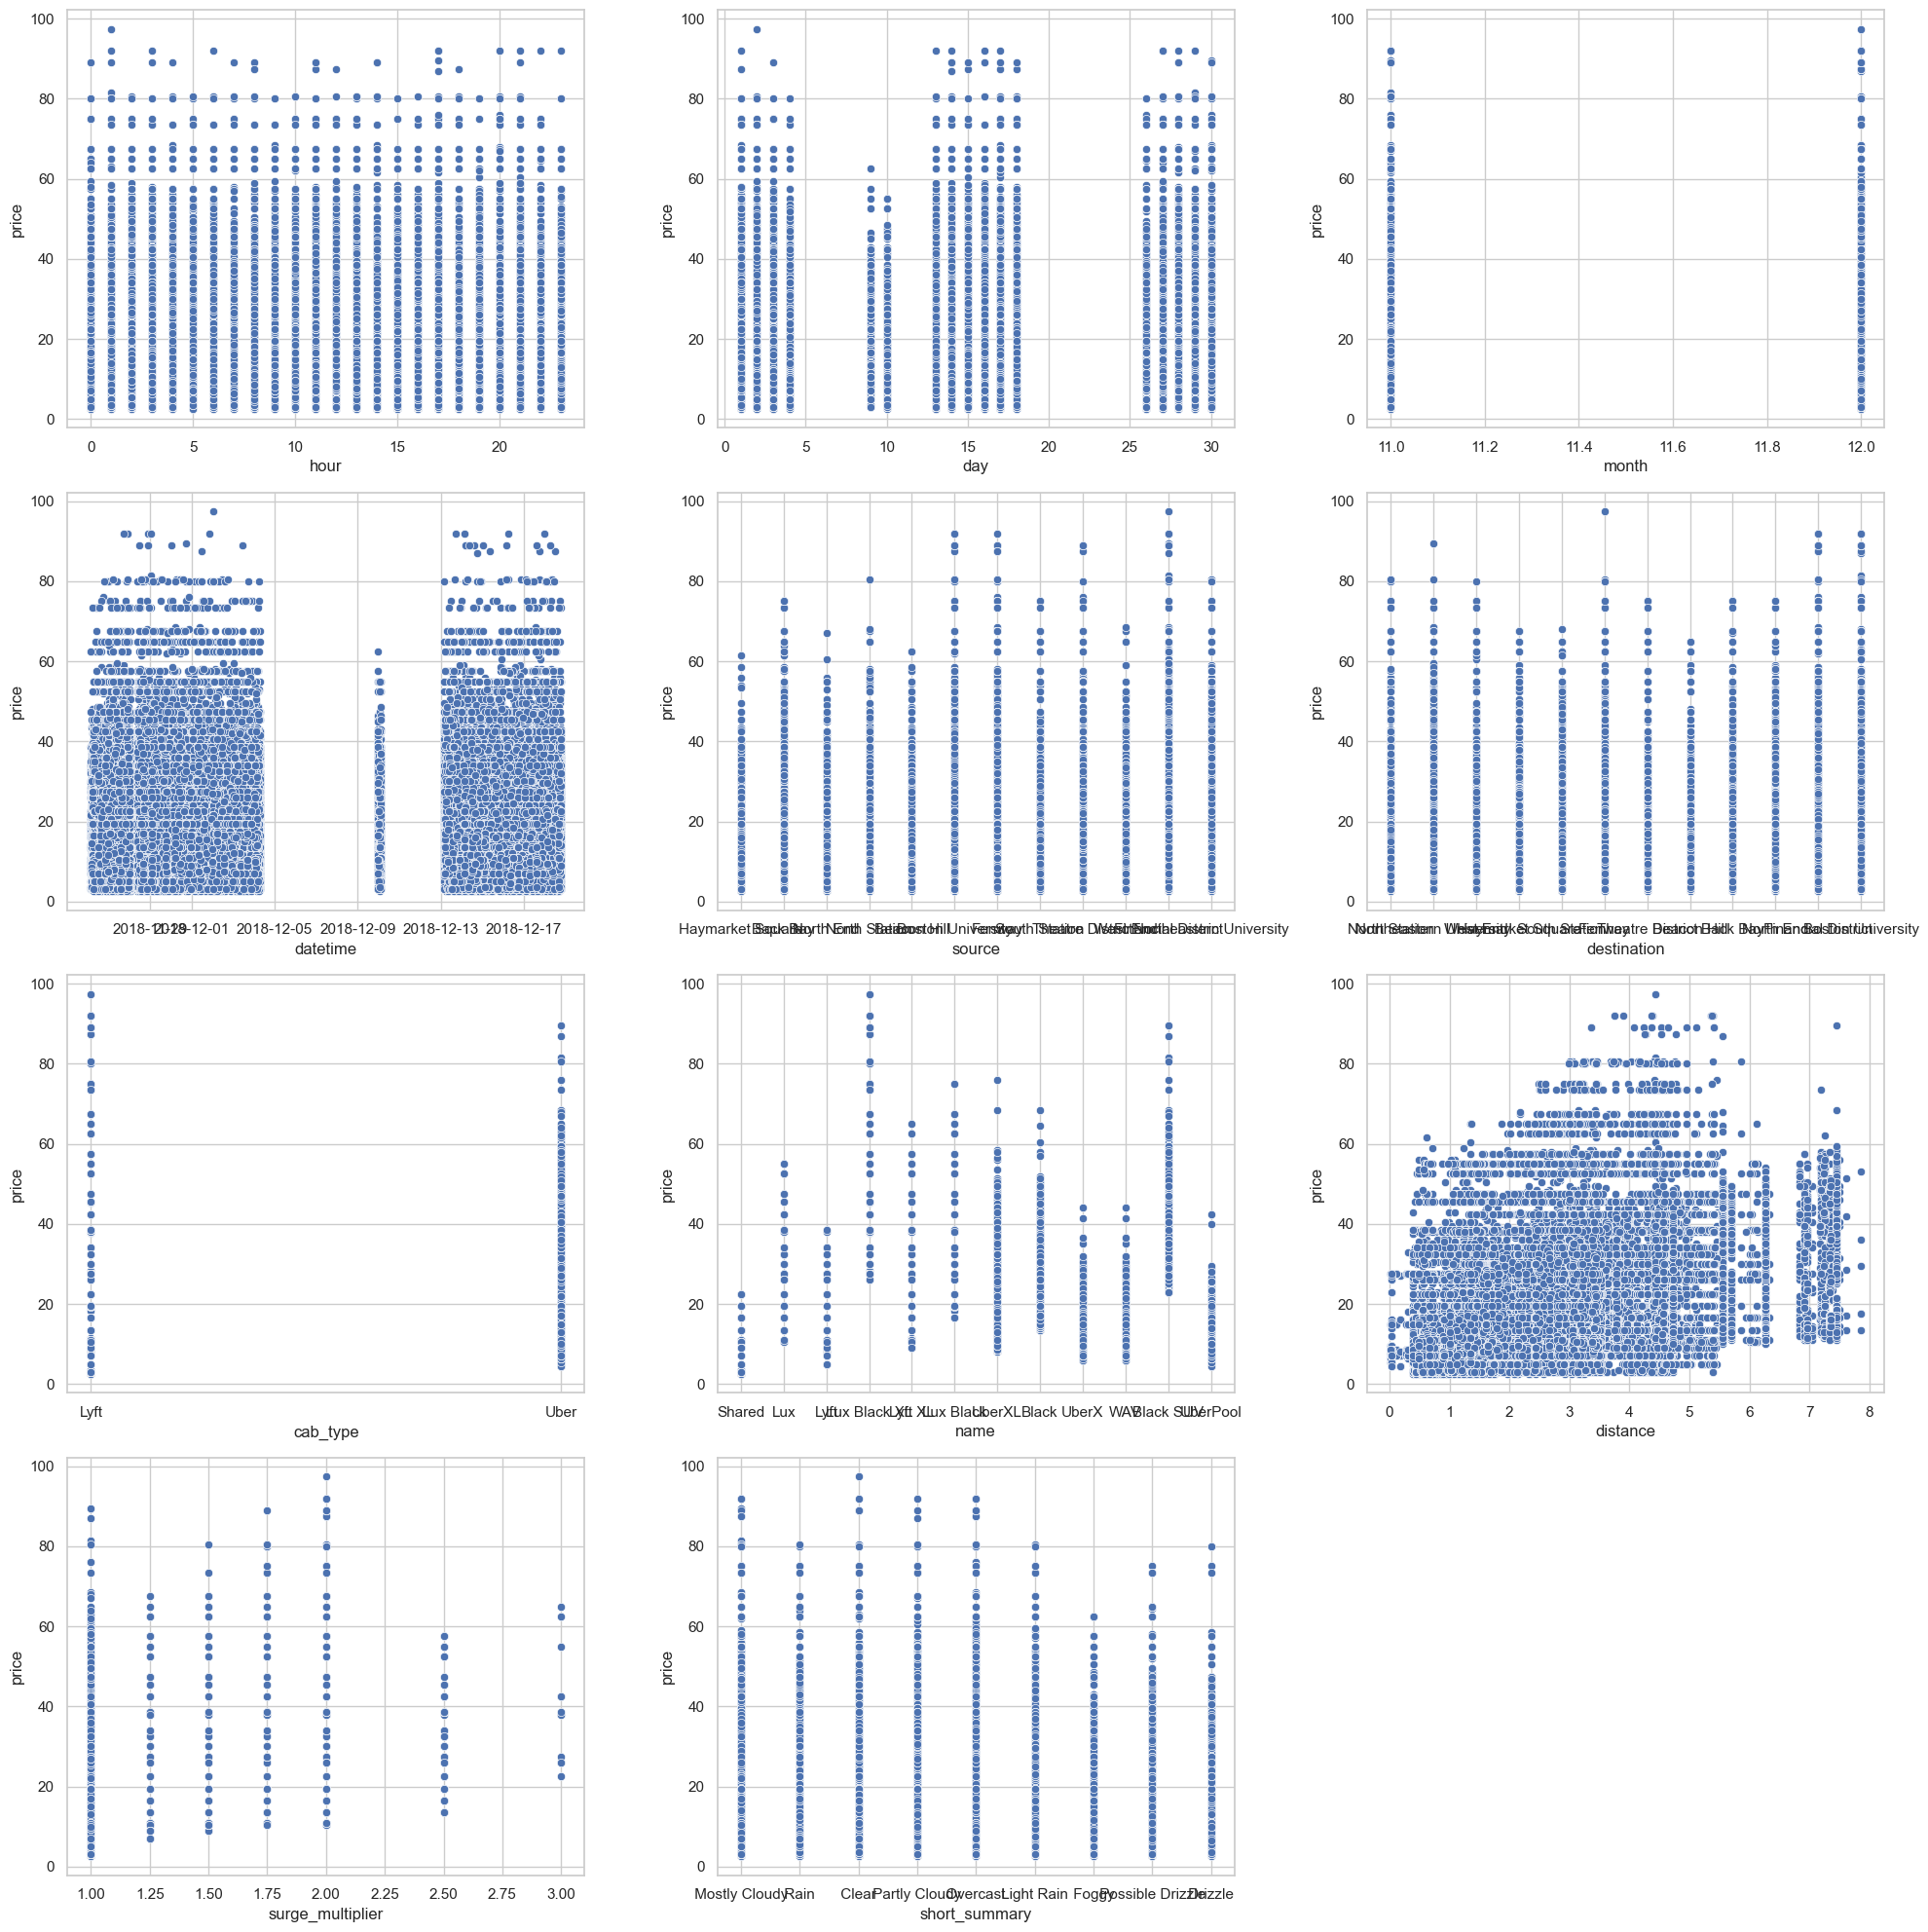

In [29]:
# Creating plot
fig = plt.figure(figsize=(20, 20))
cols = X.columns.tolist()
num_rows = 4
num_cols = 3
num_plots = min(len(cols), num_rows * num_cols)

for index in range(num_plots):
    fig.add_subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=df, x=cols[index], y='price')

plt.tight_layout()
plt.show()

Asumsi **linear relationship** terpenuhi karena membentuk garis lurus, sehingga tidak cocok untuk penggunaan model **Linear Regression**.

### Split Train and Test

In [30]:
# Splitting train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=40)

# Check the size of train-set dan test-set
print('Train-Set Size: ', X_train.shape)
print('Test-Set Size: ', X_test.shape)

Train-Set Size:  (510380, 11)
Test-Set Size:  (127596, 11)


### Handling Outliers

In [31]:
# Check skewness for numerical features
num_cols = list(X_train.select_dtypes(exclude=['object', 'datetime']).columns)

listItem2 = []

for col in num_cols:
    listItem2.append([col, X_train[col].skew()])

pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness'], data = listItem2)

,Nama Kolom,Nilai Skewness
0,hour,-0.044203
1,day,-0.378052
2,month,-0.349413
3,distance,0.820441
4,surge_multiplier,7.944120


`distance` termasuk **moderately skewed** karena memiliki *skewness* antara 0,5 dan 1. `surge_multiplier` termasuk **highly skewed** dikarenakan memiliki nilai *skewness** lebih dari 1. 

Untuk handling sendiri akan menggunakan metode **capping** untuk mempertahankan ukuran data yang sama. Metode ini cocok ketika outlier mungkin merupakan kesalahan data tetapi tetap ingin disertakan dalam analisis. Capping juga bermanfaat ketika dataset kecil dan kehilangan data bisa berdampak signifikan.

In [32]:
# Capping outlier (Normal Distribution)
winsorizer1 = Winsorizer(capping_method = 'gaussian',
                        tail='both',
                        fold = 3,
                        variables = ['hour', 'day', 'month'],
                        missing_values='ignore')

X_train_capped = winsorizer1.fit_transform(X_train)
X_test_capped = winsorizer1.transform(X_test)

In [33]:
# Capping outlier (Skewed Distribution)
winsorizer2 = Winsorizer(capping_method = 'iqr',
                        tail = 'both',
                        fold = 3,
                        variables = ['distance'],
                        missing_values = 'ignore')

X_train_capped = winsorizer2.fit_transform(X_train)
X_test_capped = winsorizer2.transform(X_test)

`surge_multiplier` tidak dapat dimasukkan ke dalam capping method IQR dikarenakan variasi data-nya yang minim.

### Splitting between Categorical and Numerical Features

In [34]:
# Defining categorical and numerical
cat_columns = X_train_capped.select_dtypes(include = ['object']).columns.tolist()
num_columns = X_train_capped.select_dtypes(include = np.number).columns.tolist()

In [35]:
# Check feature on categorical
cat_columns

['source', 'destination', 'cab_type', 'name', 'short_summary']

In [36]:
# Check feature on numerical
num_columns

['hour', 'day', 'month', 'distance', 'surge_multiplier']

In [37]:
# Splitting categorical and numerical

## Train-Set
X_train_cat = X_train_capped[cat_columns]
X_train_num = X_train_capped[num_columns]

## Test-Set
X_test_cat = X_test_capped[cat_columns]
X_test_num = X_test_capped[num_columns]

X_train_cat

,source,destination,cab_type,name,short_summary
449157,Back Bay,Haymarket Square,Lyft,Lyft XL,Partly Cloudy
518584,North Station,North End,Uber,UberPool,Partly Cloudy
627160,West End,Northeastern University,Lyft,Lyft XL,Partly Cloudy
678838,Fenway,North Station,Uber,Black SUV,Clear
377314,Theatre District,Boston University,Lyft,Lux Black XL,Light Rain
...,...,...,...,...,...
150885,Northeastern University,Theatre District,Uber,WAV,Clear
217433,Boston University,West End,Uber,Black,Overcast
148855,South Station,North Station,Lyft,Lyft XL,Overcast
124218,Boston University,Beacon Hill,Uber,Black SUV,Mostly Cloudy


### Feature Selection

In [39]:
# Feature selection categorical
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
    corr_coef, p_value = kendalltau(X_train_cat[col], y_train) 

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('Ada Korelasi')
    else:
        interpretasi.append('Tidak Ada Korelasi')

pd.DataFrame({'Nama Kolom': cols,
              'Hasil': interpretasi})

,Nama Kolom,Hasil
0,source,Ada Korelasi
1,destination,Ada Korelasi
2,cab_type,Ada Korelasi
3,name,Ada Korelasi
4,short_summary,Tidak Ada Korelasi


`short_summary` memiliki **P-Value** dibawah 0.5 yang menandakan tidak ada korelasi terhadap target (biaya). Tapi disini diputuskan untuk tidak di-*drop* dikarenakan *feature* tersebut menjelaskan cuaca saat pemesanan taxi online.

In [40]:
# Feature selection numerical
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
    corr_coef, p_value = pearsonr(X_train_num[col], y_train) # Kendall digunakan untuk kategorikal dengan outputnya numerikal

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('Ada Korelasi')
    else:
        interpretasi.append('Tidak Ada Korelasi')

pd.DataFrame({'Nama Kolom': cols,
              'Hasil': interpretasi})

,Nama Kolom,Hasil
0,hour,Tidak Ada Korelasi
1,day,Tidak Ada Korelasi
2,month,Tidak Ada Korelasi
3,distance,Ada Korelasi
4,surge_multiplier,Ada Korelasi


### Feature Scaling

Untuk **Scaling** menggunakan **MinMaxScaler** dikarenakan data bukan gaussian.

In [41]:
# Feature scaling MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.43478261, 0.        , 1.        , 0.28826531, 0.375     ],
       [0.73913043, 0.96551724, 0.        , 0.13520408, 0.        ],
       [0.47826087, 0.44827586, 1.        , 0.3877551 , 0.        ],
       ...,
       [0.43478261, 0.48275862, 1.        , 0.22321429, 0.        ],
       [0.65217391, 0.93103448, 0.        , 0.35331633, 0.        ],
       [0.91304348, 0.51724138, 1.        , 0.39030612, 0.        ]])

### Feature Encoding

Untuk **Encoding** menggunakan **One Hot Encoder** untuk *feature* kategorikal nominal.

In [42]:
# Feature Encoding OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

X_train_cat_encoded = ohe.fit_transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

X_train_cat_encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Concate

In [43]:
# Concate categorical and numerical columns
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

## Model Definition

In [44]:
# Defining Model
model_lin_reg = LinearRegression()

*Metrics* yang akan digunakan adalah **MSE** dan **RMSE** karena yang mau diprediksi adalah `price` atau harga yang mana harus meminimalisir error.

## Model Training

In [45]:
# Fitting model
model_lin_reg.fit(X_train_final, y_train)

# Time for the training
%time model_lin_reg.fit(X_train_final, y_train)

CPU times: total: 3.22 s
Wall time: 1.03 s


LinearRegression()

## Model Evaluation

In [46]:
# Predict
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

# Metrics Evaluation
print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))

MSE - Train Set  :  6.219387919102809
MSE - Test Set   :  6.15668861318536

RMSE - Train Set :  2.4938700686087896
RMSE - Test Set  :  2.481267541637814


Hasil **MSE** dan **RMSE** menunjukkan bahwa tidak ada perbedaan yang signifikan pada Train-Set dan Test-Set yang menunjukkan bahwa model adalah **Good Fit**.

## **Assumption** - Normality

In [47]:
# Getting residuals
y_test_residuals = y_test - y_pred_test
y_test_residuals

384213   -3.063625
429771    5.823322
146212    2.411732
493370    0.778347
346982    3.701603
            ...   
121212   -0.493313
626858    1.244022
690741   -1.216946
167558   -0.008390
287545    4.556065
Name: price, Length: 127596, dtype: float64

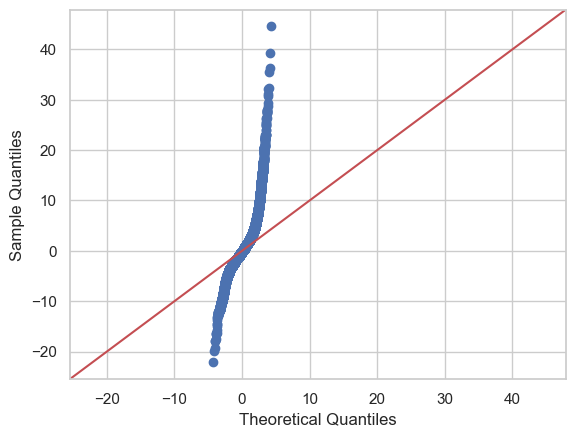

In [48]:
# QQ Plot
sm.qqplot(y_test_residuals, line = '45')
plt.show()

Asumsi tidak terpenuhi karena terdapat kurva dalam garis. 

## **Assumption** - No Auto Correlation

In [49]:
# Durbin-Watson Test
durbin_watson(y_test_residuals)

1.9947414459973052

Lewat test Durbin-Watson menunjukkan nilai 1.99 yang mengindikasikan positive serial correlation. Tapi karena masih dalam range 1.5 dan 2.5 maka auto-correlation tidak terlalu bermasalah. Jadi asumsi terpenuhi.

## Assumption - Homoscedasticity

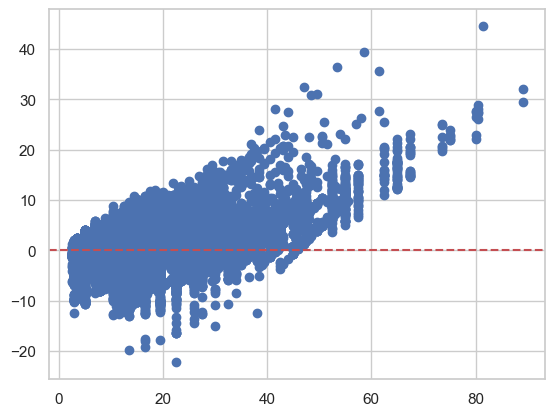

In [50]:
# Check homoscedasticity
plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

`y_test_residuals` dan `y_test` memiliki pola yang cenderung naik, yang artinya heteroscedasticity. Jadi asumsi tidak terpenuhi.

## Model Saving

In [51]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(ohe, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

## Model Inference

In [54]:
# Load Files
with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_cols = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_cols = json.load(file_2)

with open('encoder.pkl', 'rb') as file_3:
  encoder = pickle.load(file_3)

with open('scaler.pkl', 'rb') as file_4:
  scaler = pickle.load(file_4)

with open('model_lin_reg.pkl', 'rb') as file_5:
  model_lin_reg = pickle.load(file_5)

In [53]:
# Creating new random data for inference
data_inf = {
    'hour' : 12, 'day' : 14, 'month' : 12,
    'source' : 'Haymarket Square',
    'destination' : 'Financial District',
    'cab_type' : 'Uber',
    'name' : 'UberXL',
    'distance' : 21.00,
    'surge_multiplier' : 3.0,
    'short_summary' : ' Rain ',
}

data_inf = pd.DataFrame([data_inf])
data_inf

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,short_summary
0,12,14,12,Haymarket Square,Financial District,Uber,UberXL,21.0,3.0,Rain


In [55]:
# Split categorical and numerical

data_inf_cat = data_inf[list_cat_cols]
data_inf_num = data_inf[list_num_cols]
data_inf_cat

,source,destination,cab_type,name,short_summary
0,Haymarket Square,Financial District,Uber,UberXL,Rain


In [56]:
# Feature Scaling dan Encoding
data_inf_encoded = encoder.transform(data_inf_cat)
data_inf_scaled = scaler.transform(data_inf_num)

In [57]:
# Concate inference
data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis = 1)
data_inf_final

array([[0.52173913, 0.44827586, 1.        , 2.67602041, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [58]:
# Predict!
y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([107.53194809])

## Conclusion

**EDA**

Berdasarkan EDA, diantara kedua aplikasi ride-hailing Uber memiliki penggunaan yang lebih banyak dibandingkan dengan Lyft. Orang-orang lebih banyak memesan aplikasi ride-hailing pada jam 11 dan 12 malam. Temperatur rata-ratanya adalah 39°F atau apabila dikonversikan sekitar 3.98°C. Ini dikarenakan dataset diambil pada bulan November dan Desember yang mana ini adalah musim dingin di Kota New York. Namun, pada dataset cuaca ini tidak berkorelasi terhadap harga aplikasi ride-hailing. Yang menentukan naik-turunnya harga adalah jarak, surge multiplier, dan jenis kendaraan. Contohnya, apabila jarak yang ditempuh semakin tinggi maka semakin tinggi juga harganya.

**Model Evaluation**

MSE dan RMSE digunakan karena yang ingin diprediksi adalah harga, yang mana lebih baik tidak ada error untuk memprediksinya.

**Model Analysis**

Hasil MSE dan RMSE menunjukkan bahwa tidak ada perbedaan yang signifikan pada Train-Set dan Test-Set yang menunjukkan bahwa model adalah `Good Fit`. Adapun kelebihan dan kelemahan **Linear Regression**:

* Kelebihan :
1. Mudah untuk diinterpretasikan
2. Dasar untuk metode lainnya
* Kekurangan :
1. Sensitif terhadap outliers
2. Mudah overfit apabila jumlah independent variable-nya banyak.

Untuk improvement selanjutnya, bisa meng-handle outliernya atau coba menggunakan **Polynomial Regression** karena dapat melihat kurva dan pola yang lebih kompleks pada data.